# MA - INF 2201 - Computer Vision WS 22/23

### Exercise Sheet 01


In [1]:
import cv2 as cv
import numpy as np
import random
import time
from matplotlib import pyplot as plt

(300, 480, 3)


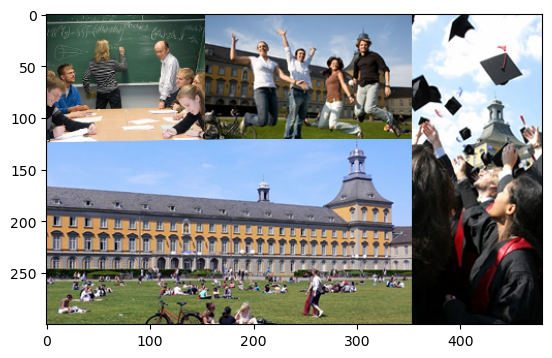

In [2]:
img = cv.imread("bonn.png")
print(img.shape)
plt.imshow(img[:, :, (2, 1, 0)])

### 1. Rectangles and Integral Images

Read the image bonn.png and convert it to a grey image.

**(a)** Compute and display the integral image without using the function
integral.

**(b)** Compute the mean grey value of the image by:

1. summing up each pixel value in the image, i.e., $ \frac{1}{R} \sum_{p\in R} I(p)$,
2. computing an integral image using the function integral,
3. computing an integral image with your implementation.
    
**(c)** Select 10 random squares of size 100x100 within the image and compute the mean grey value using the three versions. Output the runtime of this task for the three versions in seconds using time.

Mean gray value summing up 18036614 
Mean gray value cv integral 18036614 
Mean gray value my implementation 18036614 
time for sum: 0.04552937
time for cv integral: 0.00008440
time for my implementation: 0.00073576


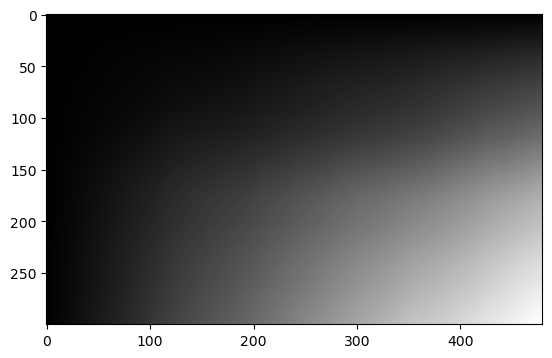

In [3]:
# ********************TASK1***********************

def integral_image(img):
    # Your implementation of integral image
    # compute cumulative sum row wise
    integral_img = np.cumsum(a=img, axis=1)
    # compute cumulative sum col wise
    integral_img = np.cumsum(a=integral_img, axis=0)

    return integral_img

def sum_image(image):
    # loop over image
    sum = 0
    for height in range(image.shape[0]):
        for width in range(image.shape[1]):
            sum += image[height, width]
    return sum

def time_10_rand_squares(fct, img, square_size):

    # get maximum random value for img corner generation
    height = img.shape[0] - square_size
    width = img.shape[1] - square_size
    #set variable to sum up all times for the 10 image patches
    time_sum = 0

    for i in range(10):
        # generate random corner for the image square
        corner = (np.random.randint(1, height + 1), np.random.randint(1, width + 1 ))
        # start timer let function run and then end timer
        start_time = time.time()
        fct(img[corner[0] : corner[0] + square_size, corner[1] : corner[1] + square_size])
        end_time = time.time()
        # sum up the time
        time_sum = time_sum + (end_time - start_time)

    return time_sum

def task1():
    # a: compute and display the integral image:
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    integral_bonn = integral_image(img_gray)
    plt.imshow(integral_bonn, cmap="gray")

    # b: compute mean gray value:
    # 1. sum up
    print("Mean gray value summing up %d " % sum_image(img_gray))
    # 2. using integral cv function
    print("Mean gray value cv integral %d " % cv.integral(img_gray)[-1, -1])
    # 3. my implementation
    print("Mean gray value my implementation %d " % integral_image(img_gray)[-1, -1])

    # c:
    print("time for sum: %0.8f" % time_10_rand_squares(sum_image, img_gray, 100))
    print("time for cv integral: %0.8f" % time_10_rand_squares(cv.integral, img_gray, 100))
    print("time for my implementation: %0.8f" % time_10_rand_squares(integral_image, img_gray, 100))
    
task1()

## 2. Histogram Equalization

Read the image bonn.png and convert it to a grey image and perform histogram equalization:

**(a)** using equalizeHist

**(b)** using your implementation of the function equalizeHist.

Display both results. Compute the absolute pixelwise difference between the results and print the maximum pixel error. (2 Points)

In [4]:
# ********************TASK2***********************
def equalize_hist_image(img):
    # Your implementation of histogram equalization
    # pixels as distribution:
    px_amount = img.shape[0] * img.shape[1]
    hist = np.unique(img, return_counts = True)

def task2():
    # Your implementation of Task2
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    equalize_hist_image(img_gray)

task2()    

In [5]:

# ************************************************
# ********************TASK4***********************
def get_kernel(sigma):
    # Your implementation of getGaussianKernel
    pass


def task4():
    # Your implementation of Task4
    pass
# ************************************************
# ********************TASK5***********************
def task5():
    # Your implementation of Task5
    pass
# ************************************************


# ************************************************
# ********************TASK8***********************
def task8():
    # Your implementation of task 8
    pass


## 5. Multiple Gaussian Filters

Read the image bonn.png, convert it into a grey image, and display it.
Filter the image

**(a)** twice with a Gaussian kernel with σ = 2

**(b)** once with a Gaussian kernel with σ = 2√2

and display both results, compute the absolute pixel-wise difference between the results, and print the maximum pixel error. (1 Point)

Max Pixel error: 255


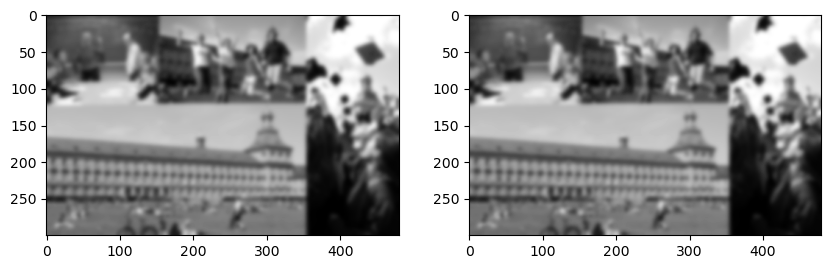

In [18]:
def task5():
    # Your implementation of task 5
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # a) apply gaussian twice
    sigma_a = 2 
    gaussian_twice = cv.GaussianBlur(img_gray, ksize=[0, 0], sigmaX=sigma_a, sigmaY=sigma_a)
    gaussian_twice = cv.GaussianBlur(gaussian_twice, ksize=[0, 0], sigmaX=sigma_a, sigmaY=sigma_a)

    # b) gaussian once
    sigma_b = 2 * np.sqrt(2)
    gaussian_once = cv.GaussianBlur(img_gray, ksize=[0, 0], sigmaX=sigma_b, sigmaY=sigma_b)

    pixel_difference = np.abs(gaussian_twice - gaussian_once)
    max_pixel_error = pixel_difference.max()
    
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    ax1.imshow(gaussian_twice, cmap="gray")
    ax2.imshow(gaussian_twice, cmap="gray")
    print("Max Pixel error:", max_pixel_error)
    

task5()

## 7. Denoising

Read the image bonn.png, convert it into a grey image, add 30% salt and pepper noise (the chance that a pixel is converted to a black or white pixel is 30%), and display it. Filter the image by

**(a)** a Gaussian kernel

**(b)** a Median filter using the function medianBlur

**(c)** a Bilateral filter using the function bilateralFilter

and display the three results. Select the filter size from the range [1, 3, 5, 7, 9] that minimizes the mean distance between the filtered image and the original grey image. (3 Points)


0.15 0.7 0.15


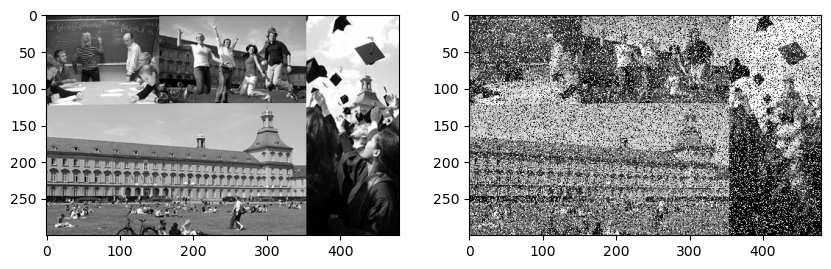

In [23]:
# ********************TASK7***********************
def add_salt_n_pepper_noise(img):
    # Your implementation of adding noise to the image
    # probability for noise
    img_cpy = img.copy()
    prob = 0.3
    # noise array with probabilty 0.3 generated, 0 for salt, 1 for normal, 255 for pepper
    print(prob/2, 1 - prob, prob/2)
    noise= np.random.choice([0, 1, 255], size=img_cpy.shape, p=[prob/2, 1 - prob, prob/2])

    img_cpy[noise == 0] = 0
    img_cpy[noise == 255] = 255

    return img_cpy

def compute_mean_distance(img1, img2):
    difference = img1 - img2
    return difference.mean()

def select_best_filtersize(img, filter_sizes, ftn, **kwargs):

    # list to save and compare best mean and save mean, filtersize, and img
    best_mean_filter = [np.infty, 0, None]

    # loop through filter sizes
    for i in filter_sizes:
        filtered_img = ftn(img, i, **kwargs)
        mean_diff = (img - filtered_img).mean()
        if best_mean_filter[0] > mean_diff:
            best_mean_filter = mean_diff
            




def task7():
    # Your implementation of task 7
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray_noise = add_salt_n_pepper_noise(img_gray)
    filter_sizes = [1, 3, 5, 7, 9]

    _, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img_gray, cmap="gray")
    ax[1].imshow(img_gray_noise, cmap="gray")


task7()